# Case study on Unsupervised Learning

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [120]:
data=pd.read_csv("wine.csv")

In [121]:
df=data.copy()

In [122]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [123]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Preprocessing

In [124]:
data.shape

(178, 13)

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [126]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [127]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

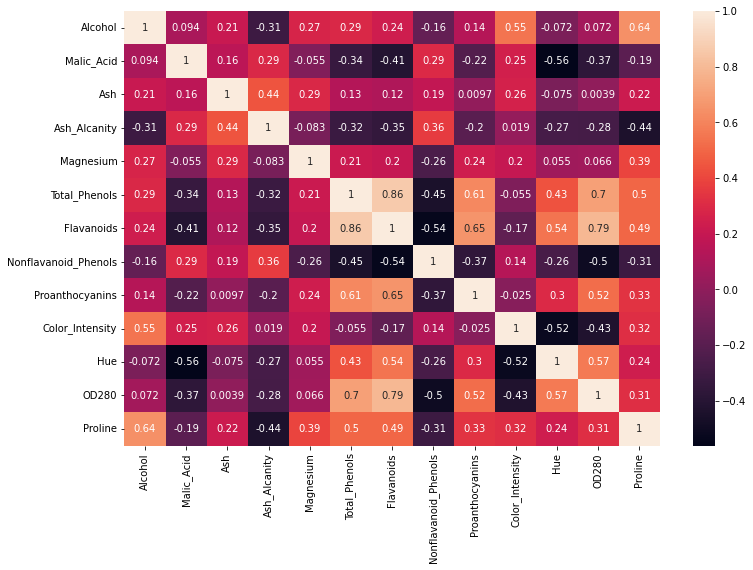

In [128]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(data.corr(), annot=True)
plt.show()

In [129]:
#Scaling
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
data_cluster=data.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)

In [130]:
data_cluster.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [131]:
#principle component analysis
from sklearn.decomposition import PCA
pca = PCA(2)
pca_result = pca.fit_transform(data_cluster)
print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 55.41%


###  KMeans Clustering

In [132]:
from sklearn.cluster import KMeans

In [133]:
#calculating within cluster sum-of-squares
wcss=[]
import warnings
warnings.filterwarnings('ignore')
print("n_clusters\t\tInertia")
for i in range(1,11):
    kmean=KMeans(n_clusters=i,init="k-means++",random_state=42)
    kmean.fit(pca_result)
    wcss.append(kmean.inertia_)
    print(i,"\t\t",kmean.inertia_)
    

n_clusters		Inertia
1 		 1282.102669579481
2 		 628.7883507554772
3 		 259.5093807511931
4 		 192.3906153023483
5 		 155.069204748917
6 		 123.0134950183353
7 		 99.24814548387023
8 		 90.3362968072811
9 		 81.72385276099871
10 		 72.66776068221806


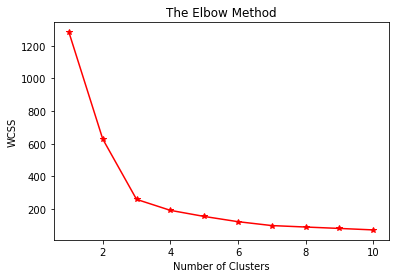

In [134]:
#plotting Elbow method
plt.plot(range(1,11),wcss,'*-',color="red")
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [135]:
kmean=KMeans(n_clusters=3,init="k-means++",random_state=42)
y_kmean=kmean.fit_predict(pca_result)
from sklearn import metrics
print('silhouette_score: ',metrics.silhouette_score(pca_result, y_kmean, metric='euclidean'))
km_three=pd.DataFrame(y_kmean, columns =['cluster'],index=data.index)
print(km_three.value_counts())

silhouette_score:  0.5610505693103247
cluster
2          65
1          64
0          49
dtype: int64


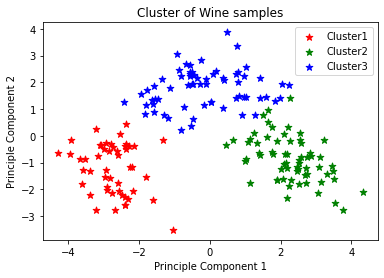

In [136]:
plt.scatter(pca_result[y_kmean==0,0],pca_result[y_kmean==0,1],s=50,marker="*",color="red",label="Cluster1")
plt.scatter(pca_result[y_kmean==1,0],pca_result[y_kmean==1,1],s=50,marker="*",color="green",label="Cluster2")
plt.scatter(pca_result[y_kmean==2,0],pca_result[y_kmean==2,1],s=50,marker="*",color="blue",label="Cluster3")
plt.title("Cluster of Wine samples")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.legend(loc="best")
plt.show()

### Agglomerative Clustering

In [137]:
from scipy.cluster import hierarchy as sch

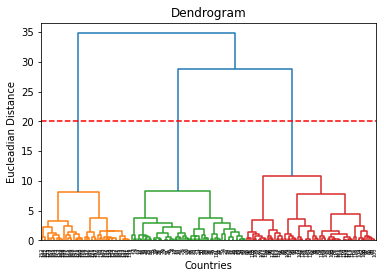

In [138]:
#plotting dendrogram
dend=sch.dendrogram(sch.linkage(pca_result,method='ward'))
plt.title("Dendrogram")
plt.xlabel("Countries")
plt.ylabel("Eucleadian Distance")
plt.hlines(20,0,27000,colors="red",linestyles="dashed")
plt.show()

The number of clusters is found to be 3

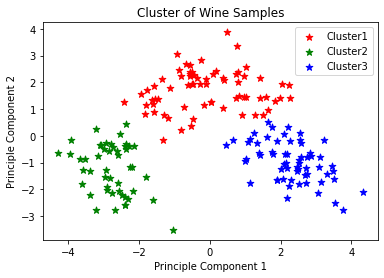

In [139]:
from sklearn.cluster import AgglomerativeClustering as ac
ac1=ac(n_clusters=3,affinity="euclidean",linkage='ward')
y_ac=ac1.fit_predict(pca_result)
plt.scatter(pca_result[y_ac==0,0],pca_result[y_ac==0,1],s=50,marker="*",color="red",label="Cluster1")
plt.scatter(pca_result[y_ac==1,0],pca_result[y_ac==1,1],s=50,marker="*",color="green",label="Cluster2")
plt.scatter(pca_result[y_ac==2,0],pca_result[y_ac==2,1],s=50,marker="*",color="blue",label="Cluster3")
plt.title("Cluster of Wine Samples")
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.legend(loc="best")
plt.show()

In [140]:
data['cluster_no']=kmean.labels_

In [141]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_no
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [142]:
data[data['cluster_no'] == 0]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_no
83,13.05,3.86,2.32,22.5,85,1.65,1.59,0.61,1.62,4.800000,0.84,2.01,515,0
130,12.86,1.35,2.32,18.0,122,1.51,1.25,0.21,0.94,4.100000,0.76,1.29,630,0
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.400000,0.74,1.42,530,0
132,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.700000,0.66,1.36,560,0
133,12.70,3.55,2.36,21.5,106,1.70,1.20,0.17,0.84,5.000000,0.78,1.29,600,0
134,12.51,1.24,2.25,17.5,85,2.00,0.58,0.60,1.25,5.450000,0.75,1.51,650,0
135,12.60,2.46,2.20,18.5,94,1.62,0.66,0.63,0.94,7.100000,0.73,1.58,695,0
136,12.25,4.72,2.54,21.0,89,1.38,0.47,0.53,0.80,3.850000,0.75,1.27,720,0
137,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.000000,0.82,1.69,515,0
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.700000,0.81,1.82,580,0


In [143]:
data[data['cluster_no'] == 1]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_no
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410,1
73,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985,1
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937,1
98,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660,1


In [144]:
data[data['cluster_no'] == 2]

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster_no
59,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520,2
60,12.33,1.10,2.28,16.0,101,2.05,1.09,0.63,0.41,3.27,1.25,1.67,680,2
61,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.75,0.98,1.59,450,2
62,13.67,1.25,1.92,18.0,94,2.10,1.79,0.32,0.73,3.80,1.23,2.46,630,2
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378,2
126,12.43,1.53,2.29,21.5,86,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352,2
127,11.79,2.13,2.78,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466,2
128,12.37,1.63,2.30,24.5,88,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342,2


### Conclusion

1.wine falling in cluster0 is more alcoholic

2.wine falling in cluster0 is more intense in color

3.wine falling in cluster0 is chemically more strong